# 分析负载中的周期性


## AzureFunction 2021

In [20]:
# 我们已经处理好了每一个函数的负载数据，现在我们来分析一下这些数据的周期性
from smart_pred.dataset.azure_trace_2021 import AzureFunction2021

In [21]:
dataset = AzureFunction2021()
dataset.init()

In [22]:
app_list = dataset.get_app_list()

In [23]:
from py_plotter.plot import Plotter

my_plotter = Plotter(
    figsize=(20,6),
    fontsize=30,
)

In [24]:
def plot_trace_with_app(app_name, output_dir="./output"):
    # 先创建一个output_dir
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 在output_dir下创建一个app_name的文件夹
    if not os.path.exists(f'{output_dir}/{app_name}'):
        os.makedirs(f'{output_dir}/{app_name}')
    
    for function in dataset.get_function_list_by_app(app_name):
        # 获取trace
        trace = dataset.get_app_function_avg_concurrency_in_sec_list(app_name=app_name, function_name=function)
        
        # 在app_name下创建一个function_name的文件夹
        if not os.path.exists(f'{output_dir}/{app_name}/{function}'):
            os.makedirs(f'{output_dir}/{app_name}/{function}')

        # 分别画14天中的每一天的
        for day in range(14):
            # 画图
            x = [i for i in range(24*60*60)]
            y = trace[day*24*60*60:(day+1)*24*60*60]
            line_data_list = []
            x_list = []
            x_list.append(x)
            line_data_list.append(y)
            
            save_name = f"{function}-{day}.pdf"
            save_root = f'{output_dir}/{app_name}/{function}'
            
            my_plotter.plot_lines(
                x_list=x_list,
                x_tick_ndigits=0,
                y_tick_ndigits=1,
                line_data_list=line_data_list,
                legend_title=None,
                legend_label_list=["ts"],
                x_label='Timestamp (s) in a day',
                y_label='Concurrency',
                title=None,
                save_root=save_root,
                filename=save_name,
            )
            
            print(f"save to {save_root}")
        
        

pickle文件 /Users/wzj/GitHubProjects/smart-pred/datasets/AzureFunctionsInvocationTraceForTwoWeeksJan2021/avg_concurrency_in_sec_by_app/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f.pickle 存在，直接读取
图片保存到:./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b0439bc06c02e3836aa/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b0439bc06c02e3836aa-0.pdf
save to ./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b0439bc06c02e3836aa
图片保存到:./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b0439bc06c02e3836aa/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b0439bc06c02e3836aa-1.pdf
save to ./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/2faf6af92ad2337d4484f71fbbf4d57d48de348018af6b

/Users/wzj/anaconda3/envs/smart-pred/lib/python3.9/site-packages/py_plotter/plot.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=self.figsize, dpi=self.dpi)


save to ./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed
图片保存到:./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed-7.pdf
save to ./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed
图片保存到:./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed-8.pdf
save to ./output/azure_function_2021/cebc121403bf0d9dff29c976ca82b8a65c400ba609db4eda83afbf7a20fc1d0f/49307de0d14b0d89fcbd61b8c2d0bfa7e1b87b94a0fd97b2a80d28047b8e72ed
图片保存到:./output/azure_functi

KeyboardInterrupt: 

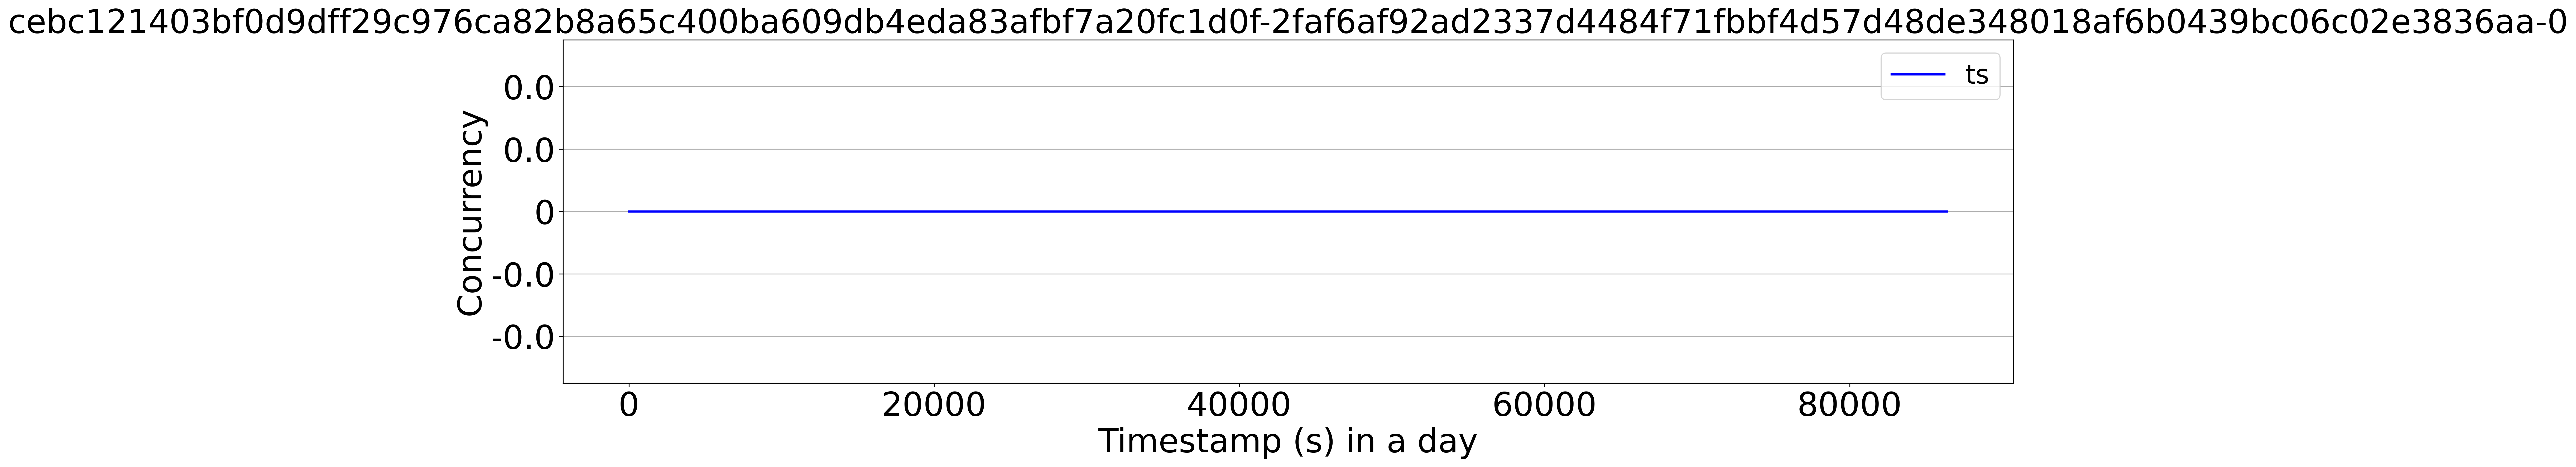

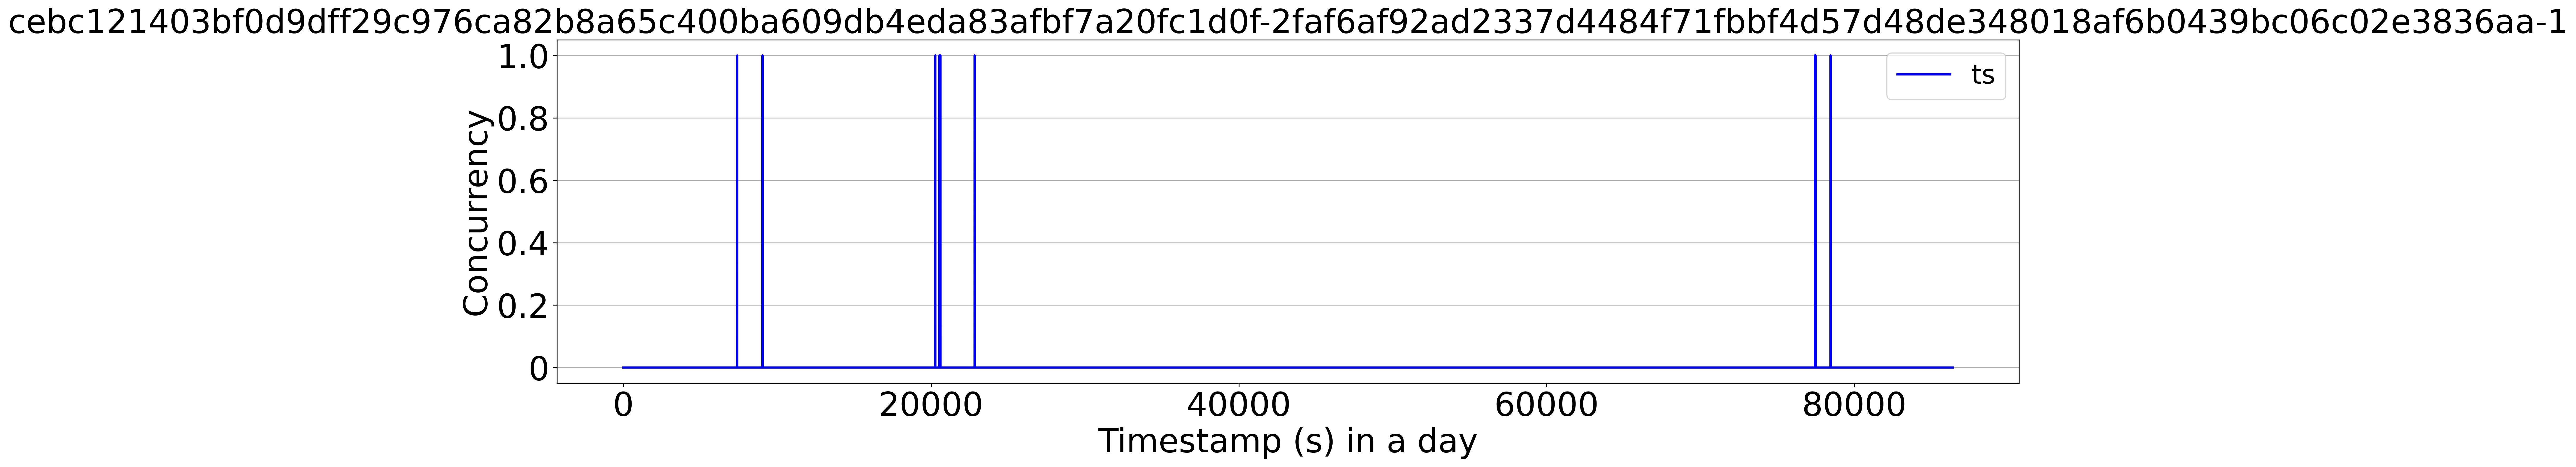

Error in callback <function flush_figures at 0x2bb8e35e0> (for post_execute):



KeyboardInterrupt



In [25]:
# 画前5个app的
for app in app_list[:5]:
    plot_trace_with_app(app_name=app, output_dir="./output/azure_function_2021")